C:\Users\bairo\AppData\Local\Temp\ipykernel_31876\173874182.py:36: RuntimeWarning: invalid value encountered in scalar divide
  return 0.01 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))


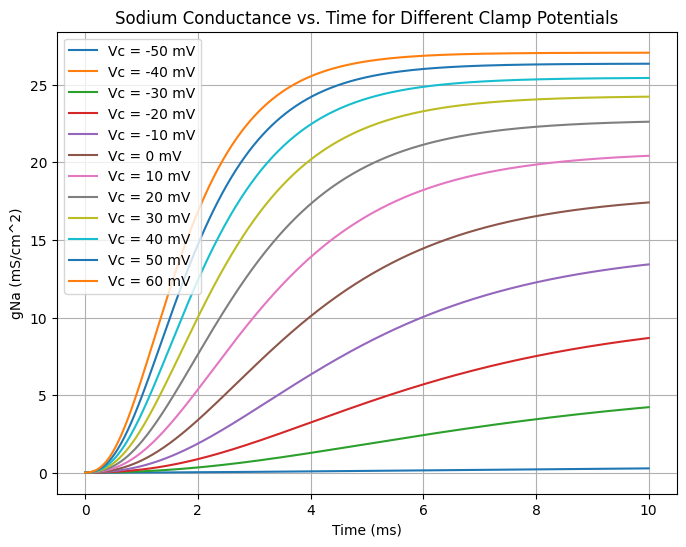

In [7]:
#!/usr/bin/env python3
"""
Simulate gating variables m(t) and h(t) under a voltage-clamp protocol.

The script:
1. Defines alpha_m, beta_m, alpha_h, beta_h for Hodgkin-Huxley sodium channels.
2. Computes gating variables over time for various clamp potentials.
3. Plots the resulting gNa(t).

You can adapt the same approach for K+ channels or different rate equations
as required by your course or textbook.
"""

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1. Model Parameters
# ------------------------------------------------------------------------------
V_rest = -68.0      # Resting membrane potential (mV)
dt = 0.02           # Time step (ms)
tmax = 10.0          # End time of simulation (ms)
t_array = np.arange(0, tmax + dt, dt)

gK_max = 30.0     # Maximum Na+ conductance (mS/cm^2), classic HH value
E_Na = 50.0         # Na+ reversal potential (mV)

# ------------------------------------------------------------------------------
# 2. Define Rate Functions alpha_m, beta_m, alpha_h, beta_h
#    (Classic Hodgkin-Huxley at ~6.3°C)
# ------------------------------------------------------------------------------
def alpha_m(V):
    """Rate constant alpha_m (1/ms)"""
    # Avoid division by zero near V = -40 mV by using a limit
    # In practice, handle numerically with a small epsilon if needed
    return 0.01 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

def beta_m(V):
    """Rate constant beta_m (1/ms)"""
    return 0.125 * np.exp(-(V + 65.0) / 80.0)


# ------------------------------------------------------------------------------
# 3. Helper Functions for Steady-State Values and Time Constants
# ------------------------------------------------------------------------------
def m_inf(V):
    return alpha_m(V) / (alpha_m(V) + beta_m(V))


def tau_m(V):
    return 1.0 / (alpha_m(V) + beta_m(V))


# ------------------------------------------------------------------------------
# 4. Initial Conditions at Rest
#    m(t=0) = m_inf(V_rest), h(t=0) = h_inf(V_rest)
# ------------------------------------------------------------------------------
m_rest = m_inf(V_rest)


# ------------------------------------------------------------------------------
# 5. Voltage-Clamp Steps
#    E.g., from -50 mV to +60 mV in increments of 10 mV
# ------------------------------------------------------------------------------
clamp_values = np.arange(-50, 61, 10)  # [-50, -40, -30, ... , +60]

# Prepare a figure for gNa(t) results
plt.figure(figsize=(8,6))

for Vc in clamp_values:
    # Compute the steady-state gating and time constants at clamp potential Vc
    m_eq = m_inf(Vc)
    
    tau_m_c = tau_m(Vc)
   
    
    # Arrays to store m(t), h(t), gNa(t), iNa(t) over time
    m_t = np.zeros_like(t_array)
    
    gNa_t = np.zeros_like(t_array)
    iNa_t = np.zeros_like(t_array)
    
    # Compute gating variables at each time step using exponential approach
    for i, t in enumerate(t_array):
        # Exponential relaxation from initial (rest) to new steady state
        m_t[i] = m_eq - (m_eq - m_rest) * np.exp(-t / tau_m_c)
        
        # Sodium conductance: gNa(t) = gNa_max * m^3 * h
        gNa_t[i] = gK_max * (m_t[i]**4) 
        
        # Sodium current: iNa(t) = gNa(t) * (Vc - E_Na)
        iNa_t[i] = gNa_t[i] * (Vc - E_Na)
    
    # Plot gNa(t) for this clamp potential
    plt.plot(t_array, gNa_t, label=f'Vc = {Vc} mV')

# Finalize the plot
plt.title('Sodium Conductance vs. Time for Different Clamp Potentials')
plt.xlabel('Time (ms)')
plt.ylabel('gNa (mS/cm^2)')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------------------------------------------------------
# 6. (Optional) Plot iNa(t) or gating variables
#    You can similarly make plots for iNa(t), m(t), or h(t).
#    For example, to plot iNa(t), you could do:
#
# plt.figure()
# for each clamp potential:
#     plt.plot(t_array, iNa_t, label=f'Vc={Vc}')
# plt.xlabel('Time (ms)')
# plt.ylabel('Na+ Current (uA/cm^2)')
# plt.show()
# ------------------------------------------------------------------------------

